<a href="https://colab.research.google.com/github/JayeshHadke/Tensor-Flow-Projects/blob/master/MNIST_Fashion_Classification_Using_Dense_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import matplotlib.pyplot as plt
import logging
import numpy as np


tfds.disable_progress_bar()

logger=tf.get_logger()
logger.setLevel(logging.ERROR)



In [ ]:
dataset,metadata=tfds.load('fashion_mnist',as_supervised=True,with_info= True)

In [ ]:
train_dataset,test_dataset=dataset['train'],dataset['test']

In [ ]:
print(train_dataset)

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [ ]:
num_train=metadata.splits['train'].num_examples
num_test=metadata.splits['test'].num_examples

In [ ]:
def normalize(images,labels):
  images=tf.cast(images,tf.float32)
  images/=255
  return images,labels


In [ ]:
train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)

In [ ]:
print(train_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
train_dataset=train_dataset.cache()
test_dataset=test_dataset.cache()


In [ ]:
print(train_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


<function matplotlib.pyplot.show>

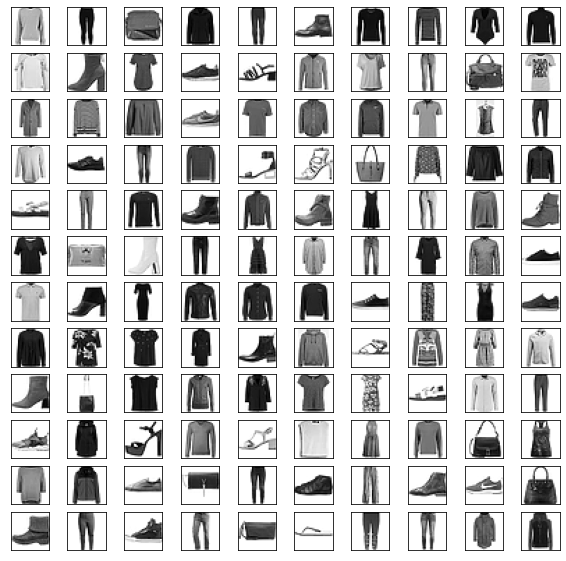

In [ ]:
 
plt.figure(figsize=(10,10))
for i,(images,labels) in enumerate(train_dataset.take(120)):
  images=images.numpy().reshape((28,28))
  plt.subplot(12,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images,cmap=plt.cm.binary)

plt.show



In [ ]:
model= tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(128,activation=tf.nn.relu),
                            tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
BATCH_SIZE=32
 
train_dataset=train_dataset.cache().repeat().shuffle(metadata.splits['train'].num_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.cache().batch(BATCH_SIZE)


In [ ]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(metadata.splits['train'].num_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4968 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3688 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3383 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3080 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2907 - accuracy: 0.8928


In [ ]:
test_error,test_accuracy=model.evaluate(test_dataset,steps=math.ceil(metadata.splits['train'].num_examples/BATCH_SIZE))
print("test error is {} and test accuracy is {} ".format(test_error,test_accuracy))

1875/1875 [==============================] - 2s 896us/step - loss: 0.3614 - accuracy: 0.8728
test error is 0.3613857626914978 and test accuracy is 0.8727999925613403 


In [ ]:

for test_images,test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  prediction=model.predict(test_images) 
  break

In [ ]:
print(prediction[0])

[5.6536450e-05 1.1468859e-05 1.6759627e-02 2.1115202e-06 8.8713831e-01
 2.9262565e-10 9.6029431e-02 1.1252443e-08 2.2850081e-06 1.3322202e-07]


In [ ]:
print(np.argmax(prediction[0]))

4


In [ ]:
print('classified object is {}'.format(metadata.features['label'].names[np.argmax(prediction[0])]))

classified object is Coat
